# Churn Prediction – Exploratory Data Analysis

### Objective of this notebook code
Understand customer behavior and identify patterns related to churn.
This EDA focuses on:
- Data structure and quality
- Target variable distribution
- Key numerical and categorical feature insights
- Initial signals that may influence churn

### About Data
**Data: Customer Churn Dataset**

- This dataset contains information about individual customers, including their demographics (age, gender), relationship with the company (tenure, subscription type, contract length), usage behavior (usage frequency, support calls, last interaction), and financial behavior (payment delay, total spend). Each row represents one customer and their characteristics at a certain point in time, along with an indicator of whether they churned or not.


- The dataset is suitable for building a machine learning model that learns patterns from these features to estimate the probability that a current customer will churn in the future. Such models are useful because retaining existing customers is usually cheaper than acquiring new ones, so early identification of at‑risk customers can directly support business retention strategies.

**Problem, objective & target**
1. Business problem
- Companies lose revenue when customers leave, and high churn can indicate poor service, pricing, or product–market fit. The core business question is:

“Which customers are likely to leave soon, and why?”.

2. Analytical / ML objective

The analytical objective is to build a classification model that, given the features (Age, Gender, Tenure, Usage Frequency, Support Calls, Payment Delay, Subscription Type, Contract Length, Total Spend, Last Interaction), predicts whether a customer will churn.

3. Target variable (Churn)
The Churn column is the target (label) the model tries to predict. A value of 1 usually means the customer has churned (cancelled or stopped using the service), and 0 means the customer is still active. All other columns act as input features that help the model learn what patterns are associated with churn.

In [107]:
# Imports
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

pd.set_option("display.max_columns", None)
sns.set(style= "whitegrid")

In [108]:
# Loads data in pandas dataframe
train_df = pd.read_csv("../RawData/customer_churn_dataset-training-master.csv")
test_df  = pd.read_csv("../RawData/customer_churn_dataset-testing-master.csv")

print(train_df.shape, test_df.shape)

train_df.head()

(440833, 12) (64374, 12)


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


##### Data Columns

In [109]:
print(train_df.columns.to_list())
print(test_df.columns.to_list())

['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Subscription Type', 'Contract Length', 'Total Spend', 'Last Interaction', 'Churn']
['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Subscription Type', 'Contract Length', 'Total Spend', 'Last Interaction', 'Churn']


##### Merge Datasets

In [110]:
# Combining test and train data
df = pd.concat([train_df, test_df], axis=0, ignore_index=True)
df.shape

(505207, 12)

##### Data Inspection

In [111]:
# Checking shape of data and data types of columns
print(f"Dataset shape: {df.shape}")
df.info()

Dataset shape: (505207, 12)
<class 'pandas.DataFrame'>
RangeIndex: 505207 entries, 0 to 505206
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         505206 non-null  float64
 1   Age                505206 non-null  float64
 2   Gender             505206 non-null  str    
 3   Tenure             505206 non-null  float64
 4   Usage Frequency    505206 non-null  float64
 5   Support Calls      505206 non-null  float64
 6   Payment Delay      505206 non-null  float64
 7   Subscription Type  505206 non-null  str    
 8   Contract Length    505206 non-null  str    
 9   Total Spend        505206 non-null  float64
 10  Last Interaction   505206 non-null  float64
 11  Churn              505206 non-null  float64
dtypes: float64(9), str(3)
memory usage: 46.3 MB


In [112]:
# Checking for no. of missing values
print(df.isna().sum())
# Checks duplicates
print(f"Duplicate values: {df.duplicated().sum()}")

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64
Duplicate values: 0


In [113]:
# Checking for missing values in dataset
df[df.isna().any(axis=1)]


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
199295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Data Cleaning

* Removing CustomerID column, it is an identifier only does not give meaningful insights.
* Removing corrupted missing row
* Changed data type of Churn (target variable) from float to int

#### Dataset Structure & Quality¶
1. Dimensions: 505,206 rows and 12 columns.
2. Data Types: It comprises 9 Numerical features (e.g., Age, Tenure, Total Spend) and 3 Categorical features (Gender, Subscription Type, Contract Length).
Data Integrity:
3. There are no missing values (nulls) in the dataset.
4. There are no duplicate records, ensuring data uniqueness.

In [114]:
#  Removing CustomerID column
df.drop(['CustomerID'], axis=1, inplace=True)
df.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [115]:
# Removing corrupted missing row
df = df.dropna()
df.isna().sum()
df.shape

(505206, 11)

In [116]:
# Changes type from float to int for 'Churn' 
df["Churn"] = df["Churn"].astype(int)

#### Target Variable Analysis (Churn)

In [117]:
# Checking Churn Imbalance
df["Churn"].value_counts(normalize=True)

Churn
1    0.555203
0    0.444797
Name: proportion, dtype: float64

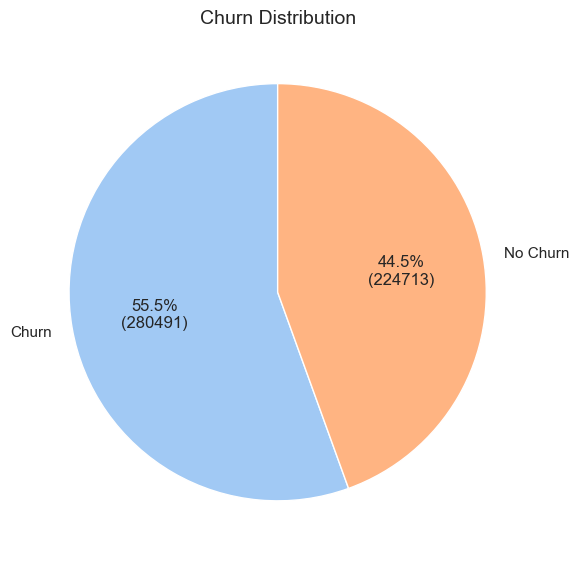

In [ ]:
# Plots Target Variable Distribution

# Count values
counts = df["Churn"].value_counts()
labels = ["Churn","No Churn"]

# Seaborn color palette
colors = sns.color_palette("pastel")[0:2]

plt.figure(figsize=(6, 6))

plt.pie(
    counts,
    labels=labels,
    colors=colors,
    autopct=lambda p: f"{p:.1f}%\n({int(p/100 * counts.sum())})",
    startangle=90,
    wedgeprops={"edgecolor": "white"}
)

plt.title("Churn Distribution", fontsize=14)
plt.tight_layout()
plt.show()



##### Target Variable (Churn) Distribution

Churn Rate: The dataset shows a churn rate of approximately 55.5% (Churn = 1), indicating a slight imbalance where more customers have churned than stayed. This provides sufficient positive samples for training predictive models.

In [119]:
# Separates Numerical & Categorical Features
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = df.select_dtypes(include=["object"]).columns

print("Numerical Features:")
print(numerical_cols)

print("\nCategorical Features:")
print(categorical_cols)


Numerical Features:
Index(['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay',
       'Total Spend', 'Last Interaction', 'Churn'],
      dtype='str')

Categorical Features:
Index(['Gender', 'Subscription Type', 'Contract Length'], dtype='str')


C:\Users\harmanjotkaur7\AppData\Local\Temp\ipykernel_13848\2168741225.py:3: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  categorical_cols = df.select_dtypes(include=["object"]).columns


In [120]:
# Numerical Feature Distributions
df[numerical_cols].describe()


,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000
mean,39.704172,31.350435,15.714825,3.833317,13.496843,620.072766,14.610581,0.555203
std,12.670577,17.237482,8.619323,3.133603,8.451187,245.319256,8.608286,0.496944
min,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,29.000000,16.000000,8.000000,1.000000,6.000000,446.000000,7.000000,0.000000
50%,40.000000,32.000000,16.000000,3.000000,13.000000,648.900000,14.000000,1.000000
75%,49.000000,46.000000,23.000000,6.000000,20.000000,824.000000,22.000000,1.000000
max,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


**Statistical Summary**
- Age: Customers range from 18 to 65 years old, with an average age of ~40.
- Tenure: The customer base includes a mix of new and long-term customers (average tenure ~31 months).
- Financials: The average Total Spend is approximately 620, with significant variance (std dev ~245).

### Univariate Analysis¶

<Figure size 1500x1000 with 0 Axes>

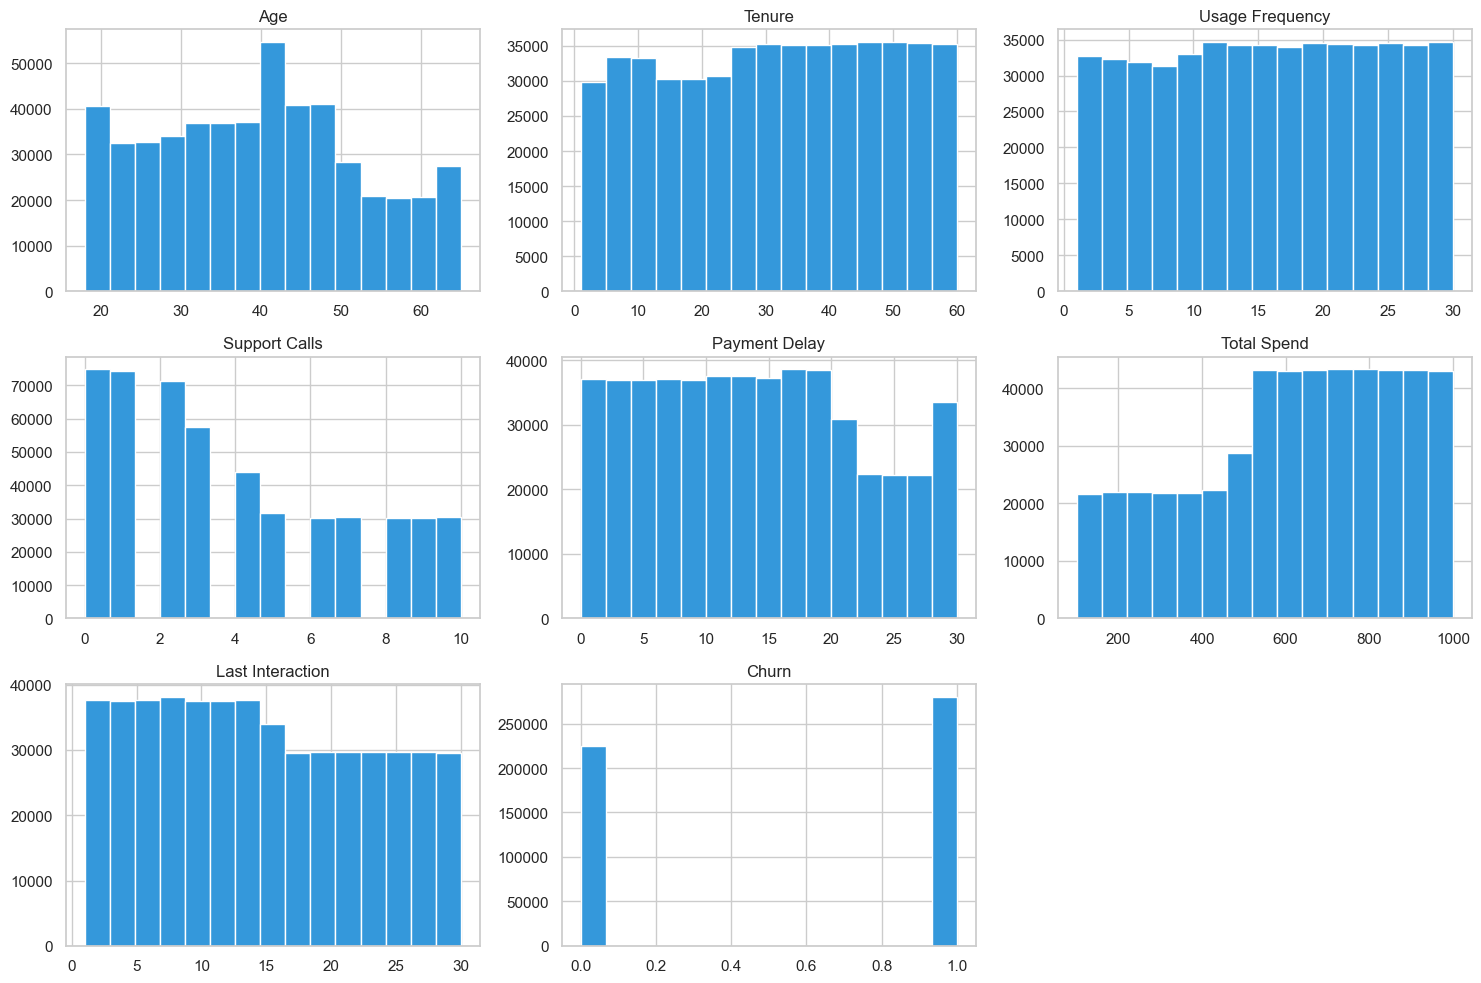

In [121]:
# Plot histograms for continuous numeric columns to check distribution
plt.figure(figsize=(15, 10))
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols].hist(bins=15, figsize=(15, 10), color='#3498DB', edgecolor='white')
plt.tight_layout()
plt.show()

##### Numeric Features Distribution¶
- **Summary**: This set of histograms visualizes the distribution of all numerical features in the dataset.

- **Insight**: Most features (like Support Calls, Total Spend) show a skewed distribution, while others (like Age) might appear more uniform or normal. Understanding these distributions is crucial for deciding on feature scaling (e.g., normalization vs. standardization).

In [122]:
# Checking jfor imbalance in categorical columns
categorical_cols = ["Gender", "Subscription Type", "Contract Length"]

for col in categorical_cols:
    print(f"\n{col} distribution:")
    print((df[col].value_counts()))




Gender distribution:
Gender
Male      280273
Female    224933
Name: count, dtype: int64

Subscription Type distribution:
Subscription Type
Standard    170630
Premium     170099
Basic       164477
Name: count, dtype: int64

Contract Length distribution:
Contract Length
Annual       198608
Quarterly    197364
Monthly      109234
Name: count, dtype: int64


C:\Users\harmanjotkaur7\AppData\Local\Temp\ipykernel_13848\2581072420.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=order, palette="viridis", ax=ax)
C:\Users\harmanjotkaur7\AppData\Local\Temp\ipykernel_13848\2581072420.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=order, palette="viridis", ax=ax)
C:\Users\harmanjotkaur7\AppData\Local\Temp\ipykernel_13848\2581072420.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=order, palette="viridis", ax=ax)


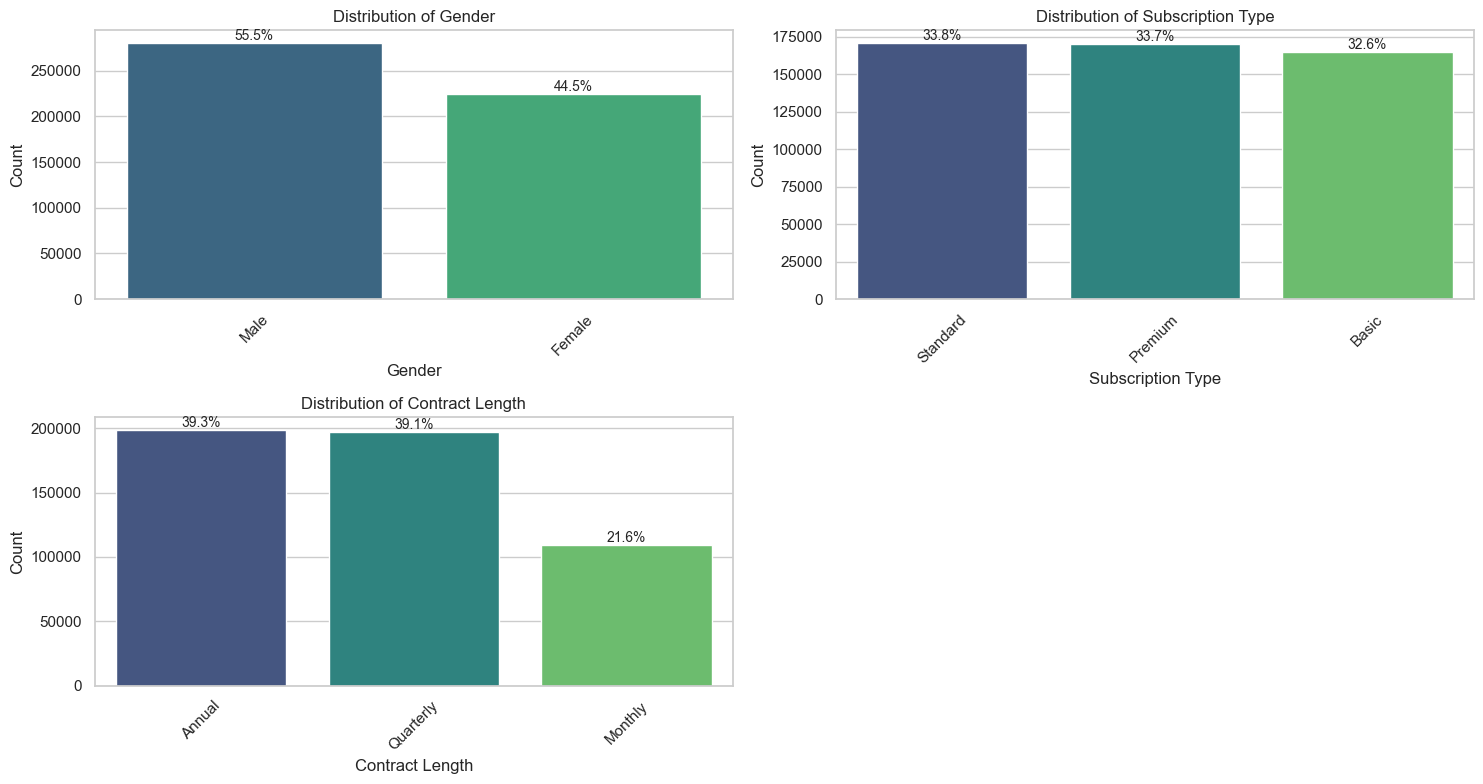

In [123]:
# Distribution bar plot of categorical columns

# Set up grid
n_cols = 2
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(15, 4 * n_rows))

for i, col in enumerate(categorical_cols, 1):
    ax = plt.subplot(n_rows, n_cols, i)

    order = df[col].value_counts().index
    total = len(df)

    sns.countplot(x=col, data=df, order=order, palette="viridis", ax=ax)

    # Add percentage labels on bars
    for p in ax.patches:
        count = p.get_height()
        percent = (count / total) * 100
        ax.annotate(
            f"{percent:.1f}%",
            (p.get_x() + p.get_width() / 2., count),
            ha="center",
            va="bottom",
            fontsize=10
        )

    ax.set_title(f"Distribution of {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Count")
    ax.tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()


#### Categorical Feature Analysis¶

- **Gender Distribution**: The dataset is fairly balanced, with Males (55.5%) slightly outnumbering Females (44.5%).
Subscription Types: The distribution across subscription types is remarkably even:
- **Standard**: ~33.8%
- **Premium**: ~33.7%
- **Basic**: ~32.6%
- **Contract Length**:
Annual and Quarterly contracts are dominant (approx. 39% each).
Monthly contracts make up a smaller portion (~21.6%).

### Bivariate Analysis

**Churn vs. Tenure Relationship¶**

Summary: Comparing customer loyalty (Tenure) against Churn status.

1. Box Plot: Shows the spread. If the median tenure for 'Churned' (Red) is widely lower than 'Not Churned' (Green), it confirms that newer customers are at higher risk.
2. KDE Plot: The density curves show probability. A high peak for Churners at low tenure indicates early-stage churn.

Tenure appears to be a moderate churn indicator, but distributions overlap.

C:\Users\harmanjotkaur7\AppData\Local\Temp\ipykernel_13848\3548509827.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Tenure', data=df, palette=['#2ECC71', '#E74C3C'])


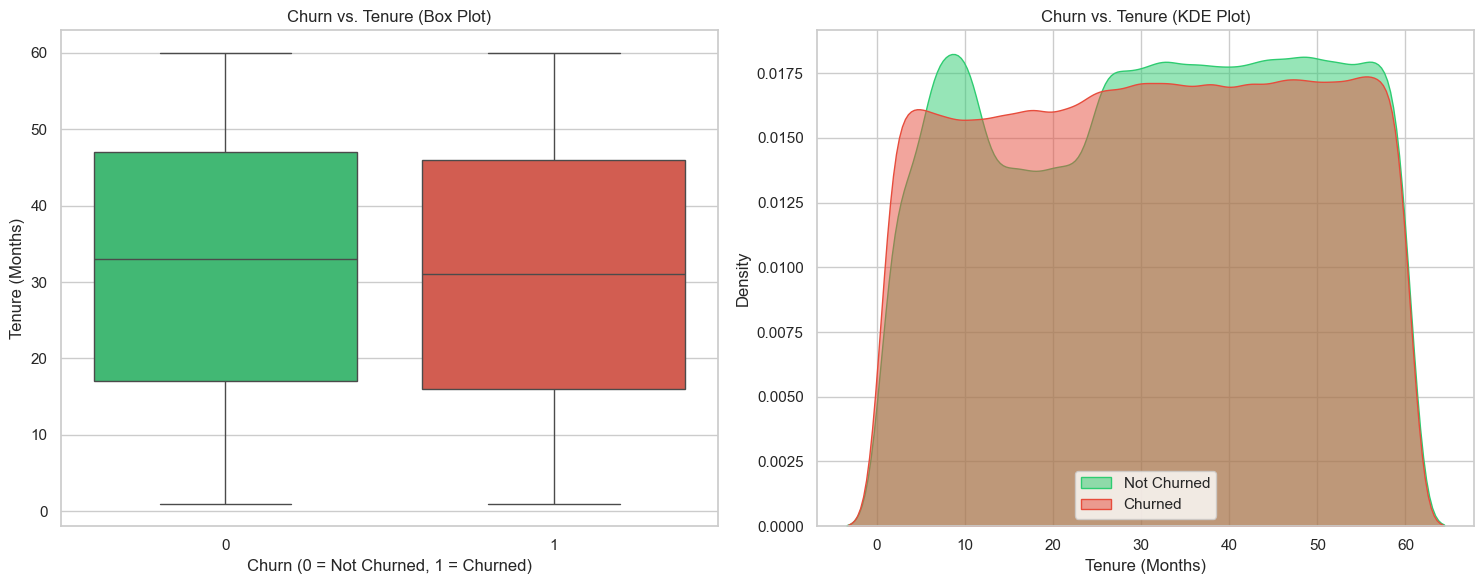

In [124]:
# Churn vs. Tenure Analysis
# Set up the figure for plots
plt.figure(figsize=(15, 6))

# Box Plot
plt.subplot(1, 2, 1)
sns.boxplot(x='Churn', y='Tenure', data=df, palette=['#2ECC71', '#E74C3C'])
plt.title('Churn vs. Tenure (Box Plot)')
plt.xlabel('Churn (0 = Not Churned, 1 = Churned)')
plt.ylabel('Tenure (Months)')

# KDE Plot
plt.subplot(1, 2, 2)
sns.kdeplot(df[df['Churn'] == 0]['Tenure'], label='Not Churned', fill=True, color='#2ECC71', alpha=0.5)
sns.kdeplot(df[df['Churn'] == 1]['Tenure'], label='Churned', fill=True, color='#E74C3C', alpha=0.5)
plt.title('Churn vs. Tenure (KDE Plot)')
plt.xlabel('Tenure (Months)')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

C:\Users\harmanjotkaur7\AppData\Local\Temp\ipykernel_13848\1968529546.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Support Calls', data=df, palette=['#2ECC71', '#E74C3C'])


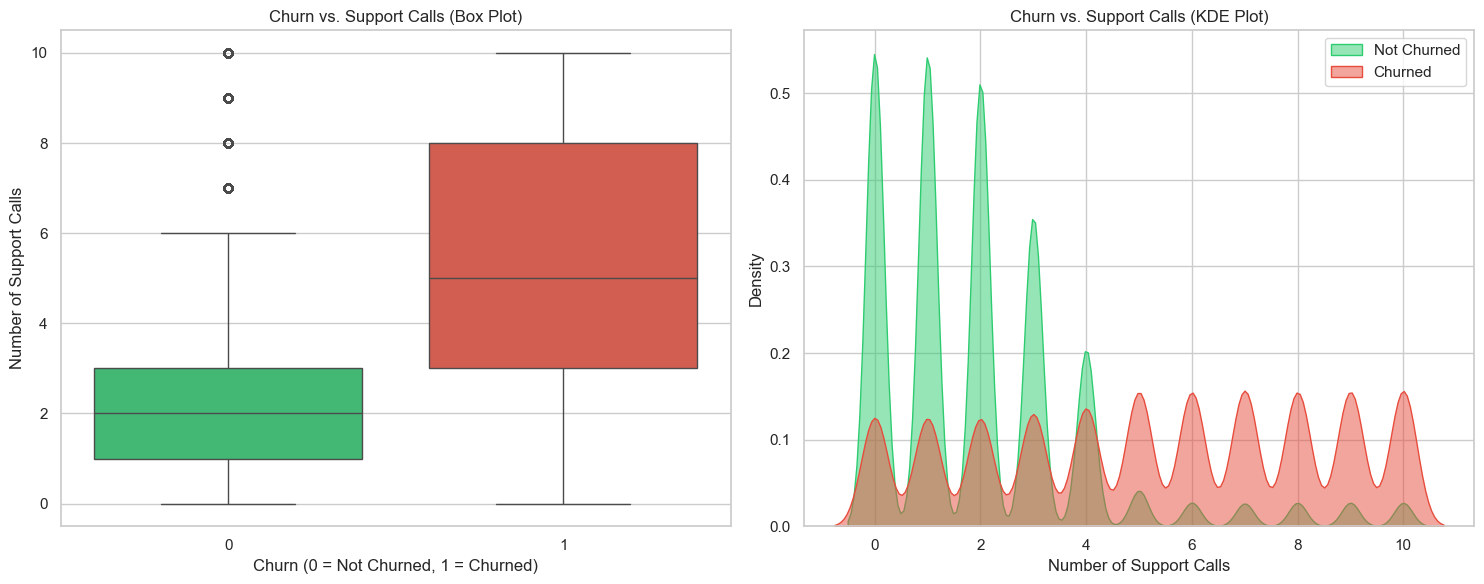

In [125]:
# Support Calls vs Churn

# Set up the figure for plots
plt.figure(figsize=(15, 6))

# Box Plot
plt.subplot(1, 2, 1)
sns.boxplot(x='Churn', y='Support Calls', data=df, palette=['#2ECC71', '#E74C3C'])
plt.title('Churn vs. Support Calls (Box Plot)')
plt.xlabel('Churn (0 = Not Churned, 1 = Churned)')
plt.ylabel('Number of Support Calls')

# KDE Plot
plt.subplot(1, 2, 2)
sns.kdeplot(df[df['Churn'] == 0]['Support Calls'], label='Not Churned', fill=True, color='#2ECC71', alpha=0.5)
sns.kdeplot(df[df['Churn'] == 1]['Support Calls'], label='Churned', fill=True, color='#E74C3C', alpha=0.5)
plt.title('Churn vs. Support Calls (KDE Plot)')
plt.xlabel('Number of Support Calls')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

**Churn vs. Support Calls**

- **Summary**: Investigating if frequent support interaction correlates with leaving.

- Insight: Highly active support users often churn due to unresolved frustration. If the Churn box/density shifts right (higher calls), it's a strong predictor.

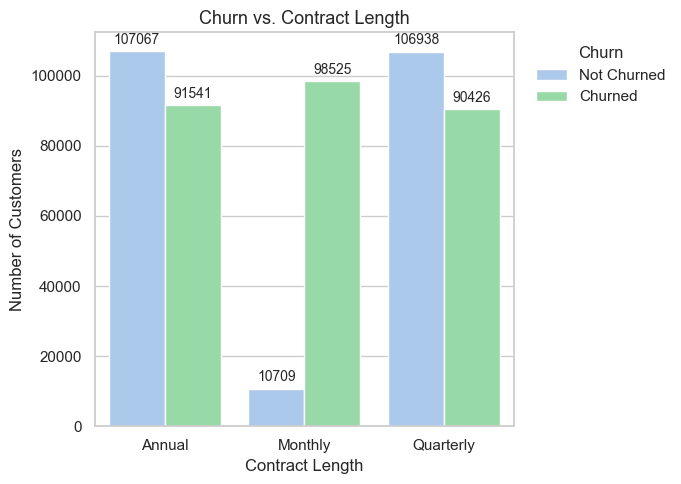

In [ ]:
# Churn vs. Contract Length (Bar Plot)

plt.figure(figsize=(7, 5))

# Soft, modern palette
palette = sns.color_palette("pastel6", 2)

ax = sns.countplot(
    x="Contract Length",
    hue="Churn",
    data=df,
    palette=palette
)

# Add value labels on bars
for container in ax.containers:
    ax.bar_label(
        container,
        fmt="%d",
        label_type="edge",
        fontsize=10,
        padding=3
    )

plt.title("Churn vs. Contract Length", fontsize=13)
plt.xlabel("Contract Length")
plt.ylabel("Number of Customers")

# Move legend outside (no overlap)
plt.legend(
    title="Churn",
    labels=["Not Churned", "Churned"],
    bbox_to_anchor=(1.02, 1),
    loc="upper left",
    frameon=False
)

plt.tight_layout()
plt.show()

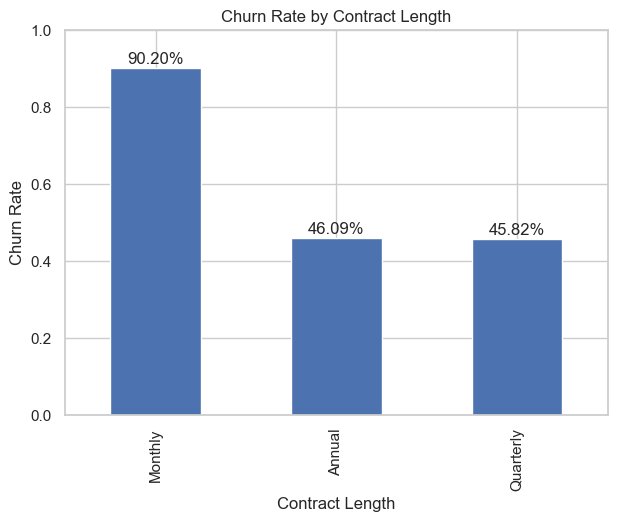

In [ ]:
# Churn rate by contract length
churn_rate_contract = (
    df.groupby("Contract Length")["Churn"]
      .mean()
      .sort_values(ascending=False)
)

churn_rate_contract
plt.figure(figsize=(7,5))
churn_rate_contract.plot(kind="bar")

plt.title("Churn Rate by Contract Length")
plt.ylabel("Churn Rate")
plt.xlabel("Contract Length")
plt.ylim(0, 1)

for i, v in enumerate(churn_rate_contract):
    plt.text(i, v + 0.01, f"{v:.2%}", ha="center")

plt.show()

##### Contract Length & Churn Rates¶
- **Summary**: This count plot breaks down churn numbers by contract type.

- Insight: Monthly contracts typically have higher churn due to flexibility. Annual contracts should show lower churn bars relative to their total count, indicating stability.


#### Mulivariant Analysis¶

**Feature Correlation Heatmap**

1. **Summary**: A matrix showing how strongly each numerical feature relates to others and the target Churn.

2. **Interpretation**:
- Red (Positive): As X increases, Y increases (e.g., Support Calls vs Churn).
- Blue (Negative): As X increases, Y decreases.
- Insight: We look for features with high correlation to Churn (predictive power) and features highly correlated with each other (multicollinearity to avoid).


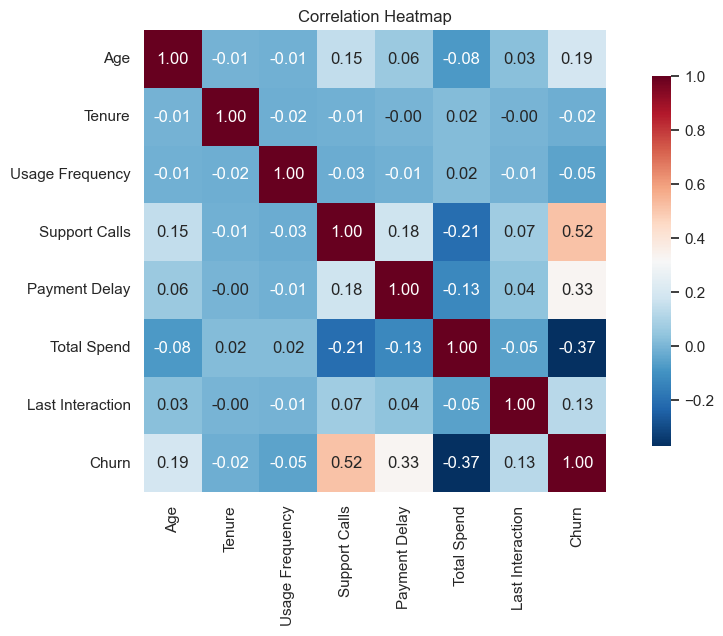

In [128]:
# Calculate the correlation matrix

df_numerical = df.select_dtypes(include=[np.number])
correlation_matrix = df_numerical.corr()

# Set up the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="RdBu_r", square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.show()

In [130]:
# After your EDA cleaning
import os

# Make folder if it doesn't exist
os.makedirs("../CleanedData", exist_ok=True)

# Save CSV
df.to_csv("../CleanedData/cleaned_churn_data.csv", index=False)

